# Runtime optimization with cost handling



In [20]:
%matplotlib inline
%reload_ext autoreload
from rtxlib.rtx_run import setup_database, db
from factorial_anova_analysis import get_raw_data

# index_steps = "crowdnav-300-150-opt20iter-ignore3000-size5000-simplerouter2par-1" 
index_steps = "crowdnav-300-150-manysteps-ignore3000-size5000-simplerouter2par-1"

results_baseline = get_raw_data(index_steps, False)

data retrieved from file crowdnav-300-150-manysteps-ignore3000-size5000-simplerouter2par-1.pickle


## Display statistics 

In [21]:
import pprint
from IPython.display import Markdown, display

def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))
    
pp = pprint.PrettyPrinter(indent=4)

knobs = {}
data = {}
for r in results_baseline:
    knob_str = str(r[1])
#     print knob_str
#     knob_str = r[1]["route_random_sigma"]
    if not knob_str in knobs:        
        knobs[knob_str] = []
    if len(knobs[knob_str]) < 5000:
        knobs[knob_str].append(r[1])
    if not knob_str in data:        
        data[knob_str] = []
    if len(data[knob_str]) < 5000:
        data[knob_str].append(r[0])

printmd("**Found " + str(len(knobs)) + " different configurations in " \
        + str(len(results_baseline)) + " data in baseline **", "green")

i = 1
for k in knobs:
    print "Configuration #" + str(i) + " (" + str(len(knobs[k])) + " data points):"
    i += 1
    pp.pprint(k)
    print "\n"

<span style='color:green'>**Found 63 different configurations in 315000 data in baseline **</span>

Configuration #1 (5000 data points):
"{u'route_random_sigma': 0.4, u'freshness_cut_off_value': 500.0}"


Configuration #2 (5000 data points):
"{u'route_random_sigma': 0.0, u'freshness_cut_off_value': 300.0}"


Configuration #3 (5000 data points):
"{u'route_random_sigma': 0.25, u'freshness_cut_off_value': 600}"


Configuration #4 (5000 data points):
"{u'route_random_sigma': 0.2, u'freshness_cut_off_value': 500.0}"


Configuration #5 (5000 data points):
"{u'route_random_sigma': 0.05, u'freshness_cut_off_value': 200.0}"


Configuration #6 (5000 data points):
"{u'route_random_sigma': 0.3, u'freshness_cut_off_value': 500.0}"


Configuration #7 (5000 data points):
"{u'route_random_sigma': 0.15, u'freshness_cut_off_value': 600.0}"


Configuration #8 (5000 data points):
"{u'route_random_sigma': 0.25, u'freshness_cut_off_value': 200.0}"


Configuration #9 (5000 data points):
"{u'route_random_sigma': 0.2, u'freshness_cut_off_value': 600.0}"


Configuration #10 (5000 data points):
"{u'route_rando

In [22]:
import matplotlib.pyplot as plt
from numpy import var, std, mean, median, percentile
import matplotlib as mpl
from math import log
mpl.rc("savefig", dpi=150)

y_key = 'complaint'

means = []
all_data = []
knob_labels = []

considered_knobs = [
    "{u'route_random_sigma': 0.0, u'freshness_cut_off_value': 600.0}",
    "{u'route_random_sigma': 0.0, u'freshness_cut_off_value': 700.0}",
    "{u'route_random_sigma': 0.05, u'freshness_cut_off_value': 400.0}",
    "{u'route_random_sigma': 0.05, u'freshness_cut_off_value': 500.0}",
    "{u'route_random_sigma': 0.05, u'freshness_cut_off_value': 600.0}",
    "{u'route_random_sigma': 0.05, u'freshness_cut_off_value': 700.0}",
    "{u'route_random_sigma': 0.1, u'freshness_cut_off_value': 300.0}",
    "{u'route_random_sigma': 0.1, u'freshness_cut_off_value': 400.0}",
    "{u'route_random_sigma': 0.1, u'freshness_cut_off_value': 500.0}",
    "{u'route_random_sigma': 0.1, u'freshness_cut_off_value': 600}",
    "{u'route_random_sigma': 0.1, u'freshness_cut_off_value': 700}",
    "{u'route_random_sigma': 0.15, u'freshness_cut_off_value': 400.0}",
    "{u'route_random_sigma': 0.15, u'freshness_cut_off_value': 500.0}",
    "{u'route_random_sigma': 0.15, u'freshness_cut_off_value': 600.0}"
]

ratios = []
all_complaints = []

min_median_overhead = 5
min_median_overhead_conf = ""

i = 0
for key in sorted(knobs):

    if key not in considered_knobs:
        continue

    print key
    overheads = [r['overhead'] for r in data[key]]
    complaints = [r['complaint'] for r in data[key]]
    print "sum: " + str(sum(complaints))
    print "count: " + str(len(complaints))
    ratio = 100*float(sum(complaints)) / len(complaints)
    print "ratio: " + str(ratio)
    ratios.append(ratio)
    all_complaints.append(sum(complaints))
    
    median_overhead = median(overheads)
    print "median overhead: " + str(median_overhead)
    if median_overhead < min_median_overhead:
        min_median_overhead = median_overhead
        min_median_overhead_conf = key
    print "---"

print "====="
print "====="
print "====="
print "average ratio:" + str(float(sum(ratios) / len(ratios)))
print "all_complaints count:" + str(sum(all_complaints))
print "minimum median overhead:" + str(min_median_overhead)
print "minimum median overhead configuration:" + str(min_median_overhead_conf)

{u'route_random_sigma': 0.0, u'freshness_cut_off_value': 600.0}
sum: 262
count: 5000
ratio: 5.24
median overhead: 1.97160169689
---
{u'route_random_sigma': 0.0, u'freshness_cut_off_value': 700.0}
sum: 245
count: 5000
ratio: 4.9
median overhead: 1.96493680734
---
{u'route_random_sigma': 0.05, u'freshness_cut_off_value': 400.0}
sum: 294
count: 5000
ratio: 5.88
median overhead: 1.96480509165
---
{u'route_random_sigma': 0.05, u'freshness_cut_off_value': 500.0}
sum: 286
count: 5000
ratio: 5.72
median overhead: 1.9740760483
---
{u'route_random_sigma': 0.05, u'freshness_cut_off_value': 600.0}
sum: 193
count: 5000
ratio: 3.86
median overhead: 1.93309297026
---
{u'route_random_sigma': 0.05, u'freshness_cut_off_value': 700.0}
sum: 258
count: 5000
ratio: 5.16
median overhead: 1.91467098203
---
{u'route_random_sigma': 0.1, u'freshness_cut_off_value': 300.0}
sum: 236
count: 5000
ratio: 4.72
median overhead: 1.94208870493
---
{u'route_random_sigma': 0.1, u'freshness_cut_off_value': 400.0}
sum: 211
c

## Plotting the results (draft)
For each step, we plot a boxplot with the obtained trip overhead values. 

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
20
63


ValueError: x and y must have same first dimension

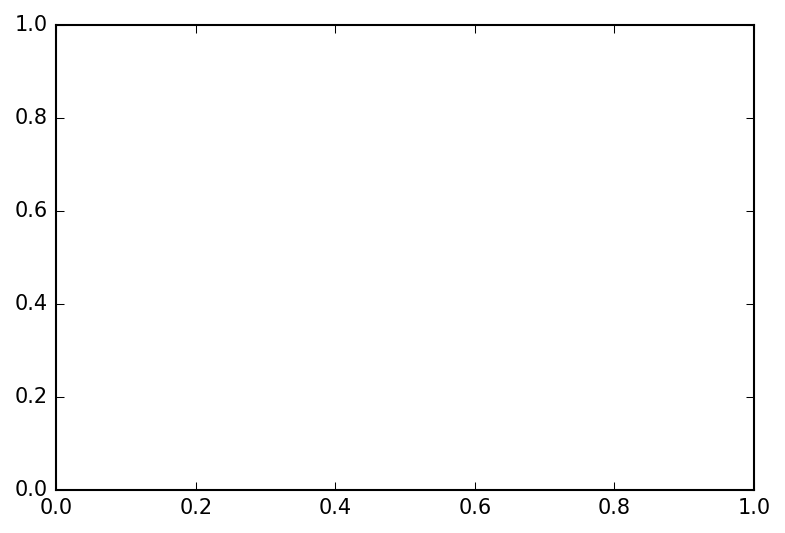

In [4]:
import matplotlib.pyplot as plt
from numpy import var, std, mean, median, percentile
import matplotlib as mpl
from math import log
mpl.rc("savefig", dpi=150)

y_key = 'complaint'

means = []
all_data = []
knob_labels = []

all_means = []
i = 0
for key in sorted(knobs):
    knob_labels.append(key)
    analysis_data = [r[y_key] for r in data[key]]
#     analysis_data = [log(r[y_key]) for r in data[key]]
    all_data.append(analysis_data)
    
#     plt.hist(analysis_data, bins='auto')  
#     plt.ylabel('number of overheads')
#     plt.xlabel('trip overhead')
#     plt.show()

#     if i % 4:
#         means = []
#     means.append(mean(analysis_data))
#     else
#     means.append(percentile(analysis_data, 95))

labels = range(1,21)
print labels
print len(labels)
print len(all_data)
fig,ax = plt.subplots()
ax.plot(labels,means, ".", label='mean', color="black", linestyle=":")
# ax.plot(knob_labels,means, ".", label='95th percentile', color="black", linestyle=":")
# ax.boxplot(all_data, 0, '', positions=knob_labels, widths=0.3)
ax.boxplot(all_data, 0, '', widths=0.3)
# plt.xticks(knob_labels, [str(l) for l in knob_labels])
plt.legend(loc='upper right')
plt.ylabel('overheads of trips')
plt.xlabel('route randomization')
plt.show()

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4]
[-5.   -4.75 -4.5  -4.25 -4.   -3.75 -3.5  -3.25 -3.   -2.75 -2.5  -2.25
 -2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75  3.    3.25  3.5   3.75
  4.    4.25  4.5   4.75]


NameError: name 'R' is not defined

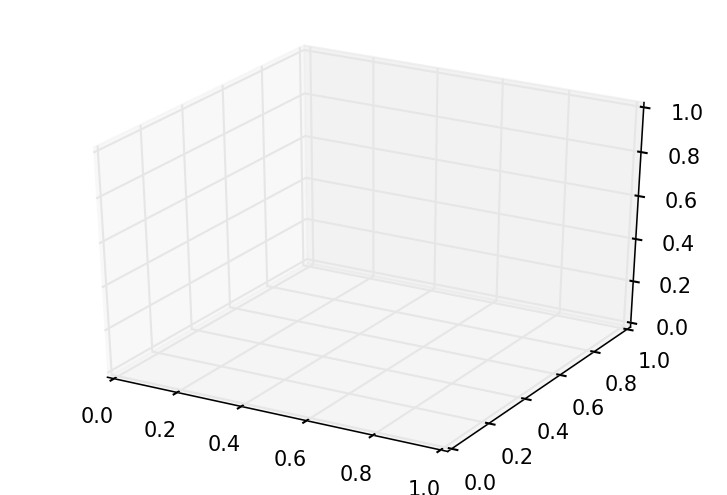

In [5]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

sigmas = [eval(l)["route_random_sigma"] for l in knob_labels]
print sigmas

cutoffs = [eval(l)["freshness_cut_off_value"] for l in knob_labels]

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
print X
Y = np.arange(-5, 5, 0.25)
# X, Y = np.meshgrid(X, Y)
# R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
print Z

# Plot the surface.
surf = ax.plot_surface(sigmas, cutoffs, means, cmap=cm.coolwarm)
# surf = ax.plot_surface(sigmas, cutoffs, means, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Customize the z axis.
# ax.set_zlim(1, 10)
# ax.zaxis.set_major_locator(LinearLocator(10))
# ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()
